<h2>You might have seen multiple notebooks on Kaggle which use this word 'EDA'. But what is it? Let us answer this question first.

<h1> What is EDA?

Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also checks while handling missing values and making transformations of variables as needed.<br>

EDA builds a robust understanding of the data, and issues associated with either the info or process. It’s a scientific approach to getting the story of the data.<br>

TYPES OF EXPLORATORY DATA ANALYSIS:<br>

Univariate Non-graphical<br>
Multivariate Non-graphical<br>
Univariate graphical<br>
Multivariate graphical<br>

<p style="font-size: 20px;"><a rel='https://www.geeksforgeeks.org/exploratory-data-analysis-eda-types-and-tools/'>More on EDA</a>

<p style="font-size: 16px;">In this notebook I have tried to perform a thorough EDA of stock price data of JPMOrgan Chase and Goldman Sachs. I have kept the code very simple and self-explanatory so that it is easy to understand and use for beginners. :D

<p style="font-size: 16px;">PROCEDURE:
<br>
1) Import the data<br>
2) Preprocess the data<br>
3) Start performing Visualisations<br>
4) After every visualsation we infer some observations from the charts

<p style="font-size: 16px;">Most people are familiar with Matplotlib and Seaborn for data visualisations. These are the household names for python libraries for data visualisation. But there's another one that has been gaining popularity lately and I am going to use it in this notebook.

<h1> What is <a rel='https://plotly.com/python'>Plotly</a>?

Python Plotly Library is an open-source library that can be used for data visualization and understanding data simply and easily. Plotly supports various types of plots like line charts, scatter plots, histograms, cox plots, etc. So you all must be wondering why Plotly over other visualization tools or libraries? Here’s the answer –
<br>
Plotly has hover tool capabilities that allow us to detect any outliers or anomalies in a large number of data points.<br>
It is visually attractive that can be accepted by a wide range of audiences.<br>
It allows us for the endless customization of our graphs that makes our plot more meaningful and understandable for others.<br>

For you reference, I am attaching a list of all named CSS colour sequences.<br>
If you want to, you can try visualising using different colours and infer which colour sequences are most suited for what type of charts.<br>
Here's the list:<br>
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

So,let's start

<h1>IMPORTING LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/The Goldman Sachs.csv
/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/JPMorgan Chase.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>IMPORTING DATA

In [3]:
df1=pd.read_csv("/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/JPMorgan Chase.csv")
df2=pd.read_csv("/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/The Goldman Sachs.csv")


<h1>PREPROCESSING DATA

<h3>Setting Company Name as Index and changing the Datatype of Date column to 'datetime64'

In [4]:
def set_ind(df,cmp_name):
    df['Date'] = df['Date'].apply(pd.to_datetime)
    df['Company']=cmp_name
    df.set_index('Company',inplace=True)

In [5]:
set_ind(df1,'JPMorgan Chase')
set_ind(df2,'The Goldman Sachs')

In [6]:
df1.head()

Date       Open       High        Low      Close  \
Company                                                                 
JPMorgan Chase 2000-01-03  49.833332  50.250000  48.083332  48.583332   
JPMorgan Chase 2000-01-04  47.083332  47.458332  46.125000  47.250000   
JPMorgan Chase 2000-01-05  46.833332  48.375000  46.000000  46.958332   
JPMorgan Chase 2000-01-06  46.750000  48.625000  46.500000  47.625000   
JPMorgan Chase 2000-01-07  48.416668  49.000000  47.333332  48.500000   

                Adj Close    Volume  
Company                              
JPMorgan Chase  24.406227  12019200  
JPMorgan Chase  23.870712  11723400  
JPMorgan Chase  23.723372   8714550  
JPMorgan Chase  24.060173   8369250  
JPMorgan Chase  24.502220   6571950

In [7]:
df2.head()

Date     Open     High     Low    Close  Adj Close  \
Company                                                                      
The Goldman Sachs 2000-01-03  94.1875  94.3750  87.750  88.3125  65.690536   
The Goldman Sachs 2000-01-04  87.0000  87.5000  82.250  82.7500  61.552921   
The Goldman Sachs 2000-01-05  80.8750  81.8750  78.375  78.8750  58.670509   
The Goldman Sachs 2000-01-06  78.6250  84.5000  78.625  82.2500  61.180992   
The Goldman Sachs 2000-01-07  83.0625  83.1875  79.875  82.5625  61.413429   

                    Volume  
Company                     
The Goldman Sachs  1822600  
The Goldman Sachs  1647700  
The Goldman Sachs  1516600  
The Goldman Sachs  1845100  
The Goldman Sachs  1127400

<h1>EXPLORATORY DATA ANALYSIS



<h3>ANALYSING VOLUMES OF STOCK TRADED</h3>
1. Volume analysis refers to the examination of the total number of securities transacted within a given time period.<br>
2. Trading volume can be analyzed to infer many trends in financial markets, such as liquidity, price reversal, trend confirmation, bullish signs, etc.<br>
3. For investors who consider volume while making trading decisions, certain indicators are available, such as PVI and NVI.<br>

In [8]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'],df['Volume'],c='midnightblue')
    plt.title('Volume Of Stock Traded for ' + cmp)
    plt.ylabel('Volume')
    plt.show()

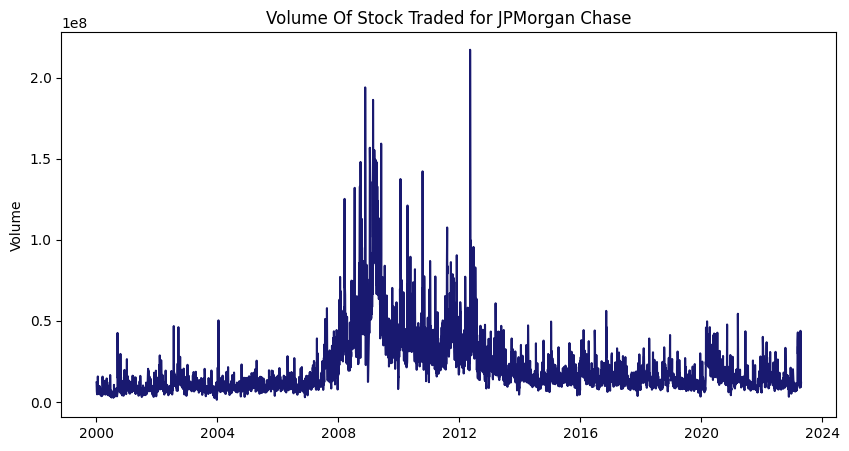

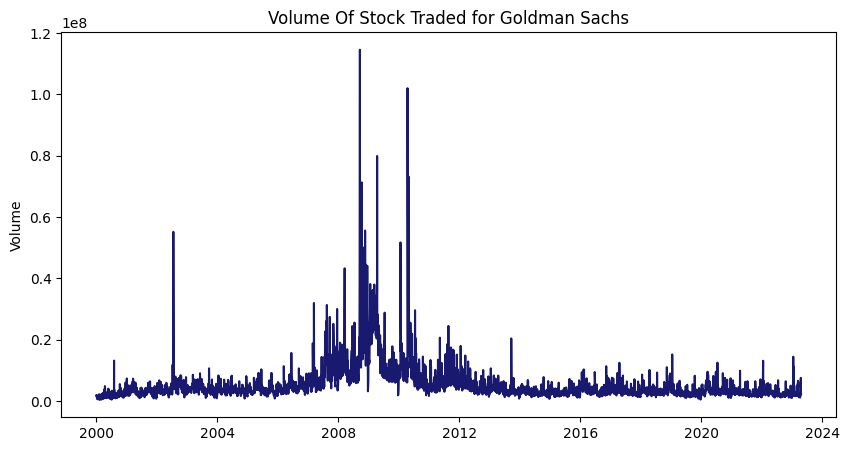

In [9]:
volume_analysis(df1,'JPMorgan Chase')
volume_analysis(df2,'Goldman Sachs')

<h2>INFERENCE</h2>

High trading volumes often indicate increased market activity and interest in a particular stock. This can be a signal of market confidence or anticipation of positive news or events related to the company.<br>

Low trading volumes can indicate decreased market interest and may suggest a lack of confidence or uncertainty about the company's future prospects.<br>

Unusual spikes <b>(2008-2012)</b> or drops in trading volumes can sometimes be a signal of a significant event or news announcement that affects the company's stock price.<br>

<h3>Analysing Opening and Closing price trends

In [10]:
def price(df,name):    
    fig=px.histogram(df,x='Date',y=['Open','Close'],
            template='plotly_dark',
            color_discrete_sequence=['pink','snow'],
            title='{}     Opening and Closing Stock Price Over Time'.format(name)
               )
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Stock Price"
    )
    fig.show()

In [11]:
print('PLOTS OF OPENING AND CLOSING PRICE')
print('\n\n\n')
price(df1,'JPMorgan Chase')
print('\n\n\n')
price(df2,'Goldman Sachs')

PLOTS OF OPENING AND CLOSING PRICE






<h2>INFERENCE

The opening price can provide an indication of market sentiment at the beginning of the trading day. If the opening price is high relative to the previous day's closing price, it may indicate positive market sentiment or anticipation of good news related to the company.<br>

The closing price can provide an indication of market sentiment at the end of the trading day. If the closing price is high relative to the opening price, it may indicate that investors were buying the stock throughout the day, and that there was strong demand for the stock.<br>

Comparing the opening and closing prices of multiple stocks can help identify trends in the market. For example, if the opening prices of both JPMorgan and Goldman Sachs are higher than their respective previous day's closing prices, it might suggest that the overall market sentiment is positive.<br>

Examining the difference between the opening and closing prices of a stock, also known as the daily price range, can provide insight into the volatility of the stock. A larger price range suggests that there was significant buying and selling activity throughout the day, while a smaller price range suggests a more stable trading environment.

<h3>A comparitive analysis of the peak and bottom line prices of stock over the years showing change in the daily range of trading.

In [12]:
def high_low(df,cmp):
    df['Daily Range']=df['High']-df['Low']
    fig = px.line(df, x='Date',y="Daily Range",
                  template='plotly_dark',
                  color_discrete_sequence=['orangered'],
                  title='Daily Stock Price Range for '+cmp)
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Trading Range"
    )
    fig.show()

In [13]:
print('PLOTS OF DAILY TRAIDNG RANGE')
print('\n\n\n')
high_low(df1,'JPMorgan Chase')
print('\n\n\n')
high_low(df2,'Goldman Sachs')

PLOTS OF DAILY TRAIDNG RANGE






<h1>INFERENCE

A wider daily trade range suggests higher volatility in the stock. This could be due to factors such as unexpected news or events, changes in the broader market, or fluctuations in investor sentiment.<br>

A narrower daily trade range suggests lower volatility in the stock, which could indicate that the market is relatively stable and that there are fewer sudden changes in investor sentiment.<br>

Comparing the daily trade ranges of JPMorgan and Goldman Sachs stocks can help identify differences in market sentiment or investor behavior between the two companies. For example, if the daily trade range of JPMorgan is consistently wider than that of Goldman Sachs, it might suggest that JPMorgan is a more volatile stock or that it is subject to more market uncertainty.
<br>

Examining the relationship between the daily trade range and the opening or closing price can help identify potential trading opportunities. For example, if the daily trade range is consistently large and the stock tends to close near the high of the day, it might suggest that the stock is experiencing bullish momentum and that there may be an opportunity to buy.

<h3>Analysing the Daily Returns on Stock

<p style="font-size: 16px;">The daily returns on a stock are calculated as a percentage change in 'adj close' stock price. Hence its value for first row will be NaN.

In [14]:
def daily_returns(df,cmp):
    df['Daily Return'] = df['Adj Close'].pct_change() 
    #We chose Adj Close here because it is inidicated as the fair price of the stock on that day. 
    #However you may also take CLose price for the analysis.
    fig=px.histogram(df,x='Date',y='Daily Return',
                     template='plotly_dark',
                     nbins=60,
                     
                     color_discrete_sequence=['cyan'],
                     title='Daily Returns on '+cmp+' stock')
    
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Returns(%)"
    )
    
    fig.show()

In [15]:
print('PLOTS FOR DAILY RETURNS')
print('\n\n\n')
daily_returns(df1,'JPMorgan Chase')
print('\n\n\n')
daily_returns(df2,'Goldman Sachs')

PLOTS FOR DAILY RETURNS






<h1>INFERENCE

Positive daily returns suggest that the stock is performing well and that there is buying interest from investors. This could be due to factors such as positive news or events related to the company, a strong earnings report, or overall bullish market sentiment.<br>

Negative daily returns suggest that the stock is performing poorly and that there is selling pressure from investors. This could be due to factors such as negative news or events related to the company, a weak earnings report, or overall bearish market sentiment.<br>

Comparing the daily returns of JPMorgan and Goldman Sachs stocks can help identify differences in market sentiment or investor behavior between the two companies. For example, if JPMorgan consistently has higher daily returns than Goldman Sachs, it might suggest that JPMorgan is a stronger performer or that it is subject to more positive market sentiment.<br>

Examining the distribution of daily returns can help identify the level of risk associated with the stock. For example, a stock with a high standard deviation of daily returns is generally considered riskier than a stock with a low standard deviation, as it has a greater potential for price fluctuations.

<h3>Visualising Daily Fluctuations

In [16]:
def compare_hcl(df,name):
    fig=px.line(df,x='Date',y=['Close','High','Low'],
            template='plotly_dark',
            color_discrete_sequence=['red','orange','blue'],
            title='{} Stock Price Over Time for'.format(name)
               )
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Fluctuations"
    )
    fig.show()

In [17]:
print('PLOTS FOR DAILY FLUCTUATIONS')
print('\n\n\n')
compare_hcl(df1,'JPMorgan Chase')
print('\n\n\n')
compare_hcl(df2,'Goldman Sachs')

PLOTS FOR DAILY FLUCTUATIONS






<h1>INFERENCE

A wider range between the daily high and low prices suggests higher volatility in the stock, with greater potential for price fluctuations. This could be due to factors such as unexpected news or events, changes in the broader market, or fluctuations in investor sentiment.<br>

The distance between the daily high and low prices relative to the closing price can help identify the level of buying or selling pressure on the stock. If the closing price is closer to the high than the low, it may indicate that there was more buying pressure on the stock during the trading day, while if the closing price is closer to the low, it may indicate that there was more selling pressure.<br>

Comparing the daily fluctuations in high, low, and close prices over time can help identify trends in the stock's performance, as well as potential support and resistance levels. For example, if the stock consistently reaches a certain high or low price before bouncing back in the opposite direction, this may indicate the presence of a support or resistance level.<br>

Examining the daily fluctuations in high, low, and close prices in conjunction with other technical indicators, such as moving averages or volume, can provide further insights into potential trading opportunities.<br>

<h3>Comparing Stock Prices of JPMorgan Chase and Goldman Sachs

<h4> We take the mean values of stock prices of the two companies and compare them 

Open price: The open price chart for both companies can provide insights into the opening sentiment of the market towards the stock. If the open price is consistently higher or lower than the previous day's close price, it may indicate bullish or bearish sentiment, respectively.
<br>

Close price: The close price chart for both companies can provide insights into the overall performance of the stock over time. If the close price is consistently higher than the open price, it may indicate a bullish trend, while if it is consistently lower, it may indicate a bearish trend.
<br>

High price: The high price chart for both companies can provide insights into the maximum price that the stock reached during each trading day. If the high price is consistently increasing over time, it may indicate bullish sentiment, while if it is consistently decreasing, it may indicate bearish sentiment.

<br>

Low price: The low price chart for both companies can provide insights into the minimum price that the stock reached during each trading day. If the low price is consistently increasing over time, it may indicate bullish sentiment, while if it is consistently decreasing, it may indicate bearish sentiment.

<br>

Volume traded: The volume traded chart for both companies can provide insights into the level of interest and activity surrounding the stock. Higher volume traded can indicate higher interest and activity, while lower volume traded can indicate lower interest and activity.

<br>

Daily returns: The daily returns chart for both companies can provide insights into the performance of the stock on a daily basis. Positive daily returns can indicate bullish sentiment, while negative daily returns can indicate bearish sentiment.

<br>

Daily range: The daily range chart for both companies can provide insights into the range of price movements that the stock experienced during each trading day. A wider daily range can indicate higher volatility, while a narrower daily range can indicate lower volatility.

In [18]:
def new_df(ptype):
    dfs=['JPMorgan Chase','Goldman Sachs']
    dict={}
    ds=[df1,df2]
    for i in dfs:
        dict[i]=0
    for i in range(len(dfs)):
        dict[dfs[i]]=ds[i][ptype].mean()
    df=pd.DataFrame(dict,index=['value'])
    df_n = df.T
    df_n.index.names=['Company']
    return df_n

In [19]:
df_open=new_df('Open')
df_close=new_df('Close')
df_high=new_df('High')
df_low=new_df('Low')
df_adj=new_df('Adj Close')
df_dailyrange=new_df('Daily Range')
df_vol=new_df('Volume')
df_dailyreturn=new_df('Daily Return')

In [20]:
df_open.head()

value
Company                   
JPMorgan Chase   64.414728
Goldman Sachs   171.307751

In [21]:
df_close.head()

value
Company                   
JPMorgan Chase   64.413200
Goldman Sachs   171.330473

In [22]:
df_high.head()

value
Company                   
JPMorgan Chase   65.132362
Goldman Sachs   173.358368

In [23]:
df_low.head()

value
Company                   
JPMorgan Chase   63.682219
Goldman Sachs   169.242244

In [24]:
df_adj.head()

value
Company                   
JPMorgan Chase   51.506623
Goldman Sachs   148.188140

In [25]:
df_dailyrange.head()

value
Company                 
JPMorgan Chase  1.450143
Goldman Sachs   4.116123

In [26]:
df_dailyreturn.head()

value
Company                 
JPMorgan Chase  0.000587
Goldman Sachs   0.000546

In [27]:
df_vol.head()

value
Company                     
JPMorgan Chase  2.032749e+07
Goldman Sachs   5.257445e+06

In [28]:
def compare_(df,name):
    fig=px.histogram(df,x=df.index,y=['value'],
                     template='plotly_dark',
                     nbins=23,
                     color_discrete_sequence=['lavenderblush'],
                     title='Comparison of '+name+' for JPMorgan Chase and Goldman Sachs'
                     )
    fig.update_layout(
    xaxis_title="Company", yaxis_title=name.upper()
    )
    fig.show()

In [29]:
compare_(df_open,'opening price')
print('\n\n')
compare_(df_close,'closing price')
print('\n\n')
compare_(df_high,'peak price')
print('\n\n')
compare_(df_low,'lowest price')
print('\n\n')
compare_(df_adj,'fair close price')
print('\n\n')
compare_(df_dailyrange,'daily trade range')
print('\n\n')
compare_(df_dailyreturn,'daily returns(%)')
print('\n\n')
compare_(df_vol,'trade volume')

<H1>INFERENCE

<p style="font-size: 16px;">Here we see that while Goldman Sachs has higher stock price value than JPMorgan Chase, the trade volume for JPMorgan Chase's stock is significantly higher. This could be because of the stock prices being low, thus giving rise to volatility.<br>
Also the daily returns over the period of 23 years are slightly higher for JPMorgan Chase stock.</p>

<p style="font-size: 16px;">This brings to the end of this notebook. I'll be bringing more on EDA of other types of datasets now. Stay tuned. Meanwhile, you can check my other stock price EDA notebooks. Please Upvote if they are helpful :D
    
<a rel='https://www.kaggle.com/code/siddhvr/google-stock-price-eda'>Google Stock Price EDA</a><br>
<a rel='https://www.kaggle.com/code/siddhvr/eda-of-adani-group-stocks'>EDA of ADANI Group Stocks</a><br>
<a rel='https://www.kaggle.com/code/siddhvr/eda-of-stock-prices-of-maang-companies'>EDA of Stock Prices of MAANG Companies</a><br>
<a rel='https://www.kaggle.com/code/siddhvr/eda-of-stock-prices-of-all-companies'>EDA of Stock Prices of all Companies</a>
     </p>